In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./images\maksssksksss0.png
./images\maksssksksss1.png
./images\maksssksksss10.png
./images\maksssksksss100.png
./images\maksssksksss101.png
./images\maksssksksss102.png
./images\maksssksksss103.png
./images\maksssksksss104.png
./images\maksssksksss105.png
./images\maksssksksss106.png
./images\maksssksksss107.png
./images\maksssksksss108.png
./images\maksssksksss109.png
./images\maksssksksss11.png
./images\maksssksksss110.png
./images\maksssksksss111.png
./images\maksssksksss112.png
./images\maksssksksss113.png
./images\maksssksksss114.png
./images\maksssksksss115.png
./images\maksssksksss116.png
./images\maksssksksss117.png
./images\maksssksksss118.png
./images\maksssksksss119.png
./images\maksssksksss12.png
./images\maksssksksss120.png
./images\maksssksksss121.png
./images\maksssksksss122.png
./images\maksssksksss123.png
./images\maksssksksss124.png
./images\maksssksksss125.png
./images\maksssksksss126.png
./images\maksssksksss127.png
./images\maksssksksss128.png
./images\maksssksksss

In [89]:
import os
import xml.etree.ElementTree as et
import re
import pandas as pd

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

for file in os.listdir("./annotations"):
    row = []
    xml = et.parse("./annotations/"+file) 
    root = xml.getroot()
    img = root[1].text
    row.append(img)
    h,w = root[2][0].text,root[2][1].text
    row.append([h,w])

    for i in range(4,len(root)):
        temp = []
        temp.append(root[i][0].text)
        for point in root[i][5]:
            temp.append(point.text)
        row.append(temp)
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
df = pd.DataFrame(dic)

Generating data in CSV format....


In [90]:
df.head()

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss0.png,"[512, 366]","[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss1.png,"[400, 156]","[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]","[with_mask, 369, 70, 398, 99]",...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss10.png,"[301, 400]","[with_mask, 98, 267, 194, 383]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss100.png,"[400, 226]","[with_mask, 189, 30, 245, 88]","[with_mask, 387, 54, 400, 75]","[with_mask, 118, 87, 163, 126]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss101.png,"[301, 400]","[with_mask, 48, 294, 164, 400]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd
import glob
import os
import cv2
import random as rand

image_directories = sorted(glob.glob(os.path.join("./images","*.png")))
j=0
classes = ["without_mask","mask_weared_incorrect","with_mask"]
labels = []
data = []

print("Extracting each data into respective label folders....")
for idx,image in enumerate(image_directories):
    img  = cv2.imread(image)
    #scale to dimension
    X,Y = df["Dimensions"][idx]
    cv2.resize(img,(int(X),int(Y)))
    #find the face in each object
    for obj in df.columns[3:]:
        info = df[obj][idx]
        if info!=0:
            label = info[0]
            info[0] = info[0].replace(str(label), str(classes.index(label)))
            info=[int(each) for each in info]
            face = img[info[2]:info[4],info[1]:info[3]]
            if((info[3]-info[1])>40 and (info[4]-info[2])>40):
                try:
                    face = cv2.resize(face, (224, 224))
                    face = img_to_array(face)
                    face = preprocess_input(face)
                    data.append(face)
                    labels.append(label)
                    if(label=="mask_weared_incorrect"):
                        data.append(face)
                        labels.append(label)

                except:
                    pass


                
print("Done!")

Extracting each data into respective label folders....
Done!


In [92]:
data = np.array(data, dtype="float32")
labels = np.array(labels)
labels

array(['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'without_mask', 'with_mask', 'with_mask',
       'with_mask', 'without_mask', 'mask_weared_incorrect',
       'mask_weared_incorrect', 'without_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'without_mask', 'with_mask',
       'without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask',
       'without_mask', 'with_mask', 'without_mask', 'without_mask',
       'mask_weared_incorrect', 'mask_weared_incorrect', 'with_mask'

In [93]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [94]:
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [95]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

W0808 19:29:34.131140  8708 mobilenet_v2.py:280] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


In [96]:
INIT_LR = 1e-4
EPOCHS = 50
BS = 1


In [97]:
len(data)

367

In [98]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.3, stratify=labels, random_state=42)

In [99]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/50
256/256 [==============================] - 12s 46ms/step - loss: 0.9696 - accuracy: 0.6953 - val_loss: 0.5538 - val_accuracy: 0.8288
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 0.5220 - accuracy: 0.8242 - val_loss: 0.3946 - val_accuracy: 0.8919
Epoch 3/50
256/256 [==============================] - 10s 40ms/step - loss: 0.3433 - accuracy: 0.8672 - val_loss: 0.3558 - val_accuracy: 0.8919
Epoch 4/50
256/256 [==============================] - 7s 25ms/step - loss: 0.4023 - accuracy: 0.8555 - val_loss: 0.3106 - val_accuracy: 0.8919
Epoch 5/50
256/256 [==============================] - 7s 25ms/step - loss: 0.3303 - accuracy: 0.9062 - val_loss: 0.2813 - val_accuracy: 0.9099
Epoch 6/50
256/256 [==============================] - 6s 25ms/step - loss: 0.2874 - accuracy: 0.8906 - val_loss: 0.2590 - val_accuracy: 0.9189
Epoch 7/50
256/256 [==============================] - 7s 25ms/step - loss: 0.2521 - accura

[INFO] evaluating network...
                       precision    recall  f1-score   support

mask_weared_incorrect       0.88      1.00      0.93         7
            with_mask       0.98      0.99      0.98        92
         without_mask       1.00      0.83      0.91        12

            micro avg       0.97      0.97      0.97       111
            macro avg       0.95      0.94      0.94       111
         weighted avg       0.97      0.97      0.97       111

[INFO] saving mask detector model...
[INFO] saving mask detector model...


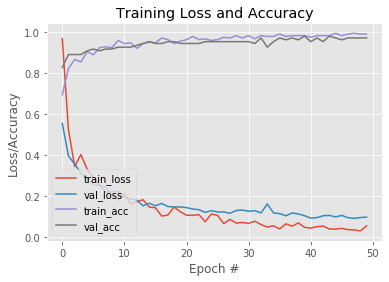

In [103]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
print("[INFO] saving mask detector model...")
model.save("model2", save_format="h5")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [101]:
# print("[INFO] evaluating network...")
# predIdxs = model.predict([testX[2],testX[0]],batch_size=32)

# # for each image in the testing set we need to find the index of the
# # label with corresponding largest predicted probability
# predIdxs = np.argmax(predIdxs, axis=1)
# predIdxs

In [2]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os

prototxtPath = "./deploy.prototxt"
weightsPath = "./res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)
model = load_model("./model2")



In [113]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
image = cv2.imread("./images/maksssksksss798.png")
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


In [114]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with
	# the detection
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > 0.2:
		# compute the (x, y)-coordinates of the bounding box for
		# the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# ensure the bounding boxes fall within the dimensions of
		# the frame
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
        # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 224x224, and preprocess it
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (224, 224))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)
		# pass the face through the model to determine if the face
		# has a mask or not
		(mask , mask2, withoutMask) = model.predict(face)[0]
        # determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask or mask2 > withoutMask  else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(image, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

-1

In [5]:
def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300),
		(104.0, 177.0, 123.0))
	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]
		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")
			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))
			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))
	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)
	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

In [10]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import os
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, net, model)
	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, mask2, withoutMask) = pred
		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask or mask2 > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(3) & 0xFF
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] starting video stream...
